* https://medium.com/tensorflow/serving-ml-quickly-with-tensorflow-serving-and-docker-7df7094aa008
* [Resnet v2](https://www.oreilly.com/library/view/advanced-deep-learning/9781788629416/ch02s03.html)\
* Extra wrapper -> https://github.com/fpaupier/tensorflow-serving_sidecar/blob/master/client.py

Follow instructions on blog. Run the container.

In [40]:
!ls /tmp/resnet/1538687457

saved_model.pb variables


Check container started correctly, then

In [14]:
!python3 resnet_client.py

Prediction class: 286, avg latency: 88.04909999999998 ms


Extract commands [from script](https://github.com/tensorflow/serving/blob/master/tensorflow_serving/example/resnet_client.py), change to post a local image

In [33]:
import base64
import requests
from PIL import Image
import numpy as np

SERVER_URL = 'http://localhost:8501/v1/models/resnet:predict'

IMAGE_URL = 'https://tensorflow.org/images/blogs/serving/cat.jpg'

def encode_image(image):
    """base64 encode an image stream."""
    base64_img = base64.b64encode(image).decode('ascii')
    return base64_img

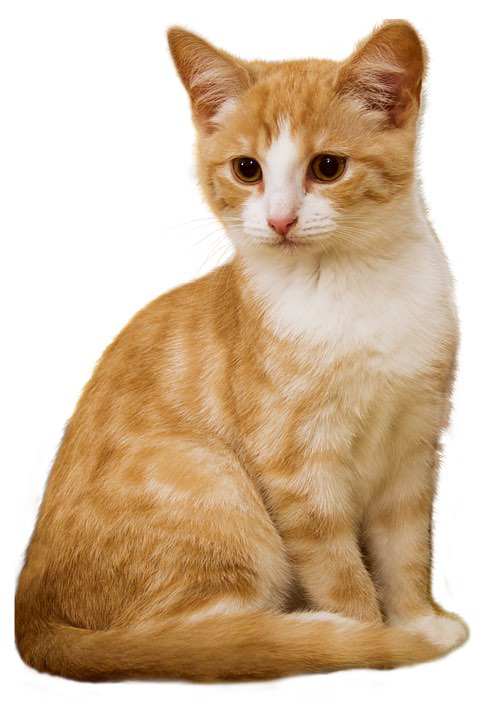

In [16]:
Image.open(cat_image)

In [20]:
with open(cat_image, "rb") as image_file:
    jpeg_bytes = base64.b64encode(image_file.read()).decode('utf-8')
    predict_request = '{"instances" : [{"b64": "%s"}]}' % jpeg_bytes

First couple of responses might be slower as model is 'warmed up'

In [26]:
%%time
response = requests.post(SERVER_URL, data=predict_request)

CPU times: user 3.82 ms, sys: 1.93 ms, total: 5.75 ms
Wall time: 121 ms


In [23]:
response.status_code

200

In [30]:
response.json()['predictions'][0]['classes']

286

In [41]:
len(response.json()['predictions'])

1

In [36]:
probabilities = response.json()['predictions'][0]['probabilities']
probabilities[:5]

[2.41628277e-06, 1.90121784e-06, 2.72477046e-05, 4.42638878e-07, 8.98363e-07]

Get the index of the most likely prediction

In [37]:
likely_class_index = np.argmax(probabilities)
likely_class_index

286

In [38]:
probabilities[likely_class_index]

0.536975086